In [ ]:
from google.colab import files
files.upload()  # Pilih file `kaggle.json` dari komputer Anda

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cherylangeline","key":"6c0147d503ae11eb9be21ea59500d968"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Buat folder .kaggle jika belum ada
os.makedirs('/root/.kaggle', exist_ok=True)

# Pindahkan file ke /root/.kaggle/
!mv kaggle.json /root/.kaggle/

# Berikan izin akses yang benar
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

# Unduh dataset dan simpan di direktori 'dataset/'
api.dataset_download_files('kaustubhb999/tomatoleaf', path='dataset/', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf


In [ ]:
import os
os.listdir('dataset/')

['tomato']

In [ ]:
!kaggle datasets list

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadroshaanriaz/students-performance-dataset-cleaned     Students Performance | Clean Dataset                10KB  2024-10-29 19:32:26           4903         89  1.0              
ironwolf437/laptop-price-dataset                             Laptop Price - dataset‏                             25KB  2024-11-12 15:50:44           1083         28  1.0              
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset       11KB  2024-09-28 20:21:12          26140        516  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercis

In [ ]:
import os

# Menampilkan struktur folder di dalam /content/dataset
for root, dirs, files in os.walk("/content/dataset"):
    print("Folder:", root)
    print("Sub-folder:", dirs)
    print("File:", files)
    print("-" * 50)


Folder: /content/dataset
Sub-folder: ['tomato']
File: []
--------------------------------------------------
Folder: /content/dataset/tomato
Sub-folder: ['train', 'val']
File: ['cnn_train.py']
--------------------------------------------------
Folder: /content/dataset/tomato/train
Sub-folder: ['Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___healthy', 'Tomato___Target_Spot', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
File: []
--------------------------------------------------
Folder: /content/dataset/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite
Sub-folder: []
File: ['e533effc-696a-45d4-b05e-43b83ae4e821___Com.G_SpM_FL 8754.JPG', '81694ba2-5158-48aa-8b54-80ab5cae801c___Com.G_SpM_FL 9308.JPG', 'a46bbe0e-2964-41df-abe5-f9c9a6934c37___Com.G_SpM_FL 1599.JPG', '365cd045-b802-4ab5-89a3-81dd5131f96b___Com.G_SpM_FL

In [ ]:
#Import library awal yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import tensorflow as tf
import cv2
import tqdm
import glob
%matplotlib inline

In [ ]:
#Mengecek apakah ada gambar yang rusak pada folder Validation
from PIL import Image
from pathlib import Path

for file_path in Path('/content/dataset/tomato/val').glob('**/*.jpg'):
    print('Check: %s' % file_path)

    im = Image.open(file_path)
    im.verify()

    print('Done.')

Check: /content/dataset/tomato/val/Tomato___Late_blight/1cb5d336-3649-49bf-aa9a-72950067b8b0___GHLB_PS Leaf 12 Day 9.jpg
Done.
Check: /content/dataset/tomato/val/Tomato___Late_blight/0b988f87-fdce-40ba-aa09-7e6c9e1d6d30___GHLB_PS Leaf 21 Day 8.jpg
Done.
Check: /content/dataset/tomato/val/Tomato___Late_blight/1f38a263-cfb5-47fe-8c0e-f8d62141f922___GHLB_PS leaf 28 Day 12 .jpg
Done.
Check: /content/dataset/tomato/val/Tomato___Late_blight/1f2dc4ae-5264-443a-a103-67fafb37bc70___GHLB_PS Leaf 26.1 Day 16.jpg
Done.
Check: /content/dataset/tomato/val/Tomato___Late_blight/1bfebfc9-3eda-4889-bdb1-75a8929a1b4f___GHLB_PS Leaf 48 Day 18.jpg
Done.


10


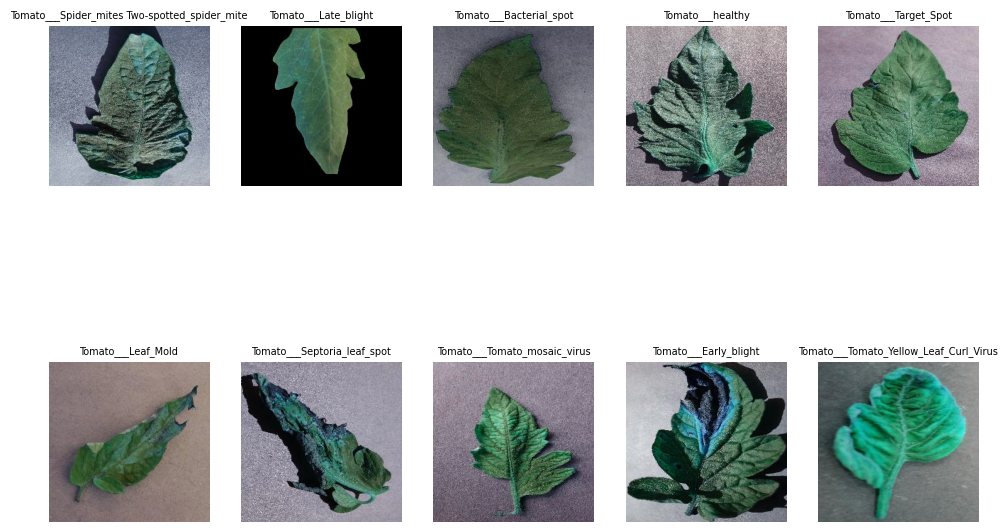

In [ ]:
#Menampilkan Contoh Gambar dari Dataset
plt.figure(figsize=(12,8))

a=0
temp = []
for i in os.listdir('/content/dataset/tomato/train'): #Akses subdirektori di dalam folder train
  path =  os.path.join('/content/dataset/tomato/train',i)
  for j in os.listdir(path): #Membaca file di dalam setiap subdirektori
    path2 = os.path.join(path,j)
    a+=1
    plt.subplot(2,5,a)
    plt.imshow(cv2.imread(path2))
    plt.title(i, fontsize=7)
    plt.axis('off')

    break

print(a)

In [ ]:
#Mengabaikan data yang rusak
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Melakukan normalisasi gambar
train_datagen = ImageDataGenerator(rescale = 1.0 / 255.0)

valid_datagen = ImageDataGenerator(rescale = 1.0 / 255.0)

In [ ]:
#Mendefenisikan data train
train_dataset  = train_datagen.flow_from_directory(directory = '/content/dataset/tomato/train',#Direktori data train
                                                   target_size = (224,224),#Dimensi gambar (Panjang x Lebar)
                                                   class_mode = 'categorical',#Mendefinisikan mode kelas (Categorical berarti kelas akan dibentuk kedalam one-hot-encoding)
                                                   batch_size = 32)#Mendefinisikan batch size

Found 10000 images belonging to 10 classes.


In [ ]:
#Mendefenisikan data validation
val_dataset  = valid_datagen.flow_from_directory(directory = '/content/dataset/tomato/val',#Direktori data validation
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   shuffle = False,
                                                   batch_size = 32)

Found 1000 images belonging to 10 classes.


In [ ]:
#Menghitung jumlah seluruh dataset
total = train_dataset.samples + val_dataset.samples
total

11000

In [ ]:
#Melihat label apa saja yang digunakan
train_dataset.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

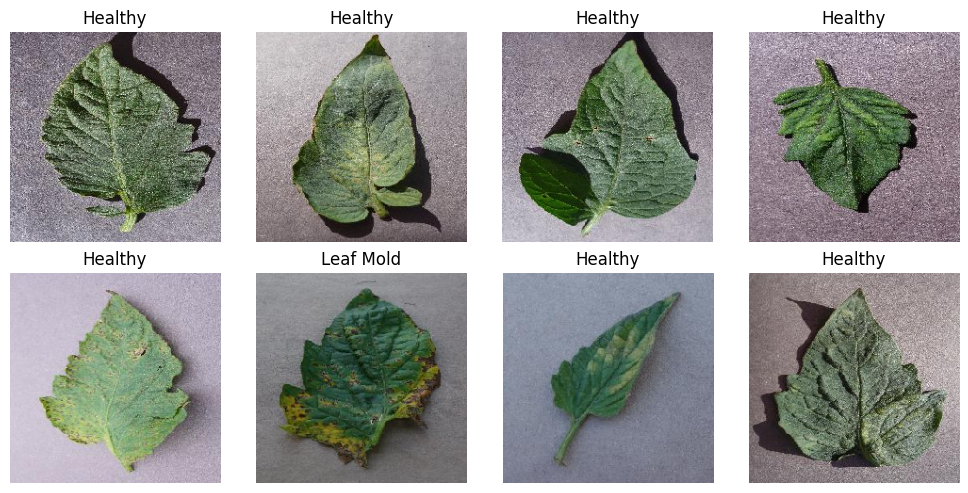

In [ ]:
#Plot gambar dari folder train secara acak
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))#Mendefinisikan ukuran gambar

for i in range(2):
    for j in range(4):
        rand1 = np.random.randint(len(train_dataset))
        rand2 = np.random.randint(10)
        ax[i, j].imshow(train_dataset[rand1][0][rand2])
        ax[i, j].axis('off')
        label = train_dataset[rand1][1][rand2]
        class_label = np.argmax(label)  # Mendapatkan nilai maximum pada label
        if class_label == 0:
            ax[i, j].set_title('Bacterial Spot')
        elif class_label == 1:
            ax[i, j].set_title('Leaf Mold')
        elif class_label == 2:
            ax[i, j].set_title('Tomato Mosaic Virus')
        else:
            ax[i, j].set_title('Healthy')

plt.tight_layout()
plt.show()

In [ ]:
#Mengambil model pretrained MobileNetV2 dari tensorflow keras
from tensorflow.keras.applications import MobileNetV2


pretrained_model = tf.keras.applications.MobileNetV2(input_shape=[224, 224, 3],
                                                     include_top=False,
                                                     weights="imagenet")

pretrained_model.trainable = False

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Activation, InputLayer
from tensorflow.keras.models import Model


x = pretrained_model.output

#Menambahkan layer di atas base model
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(16, kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
output_tensor = Dense(10, activation='softmax')(x)

#Membuat model fungsional
model = Model(inputs=pretrained_model.input, outputs=output_tensor)

model.summary()


Model: "functional_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 3,512,634 (13.40 MB)

 Trainable params: 1,129,178 (4.31 MB)

 Non-trainable params: 2,383,456 (9.09 MB)

In [ ]:
#Mendefenisikan fungsi untuk optimiser yaitu dengan metode adam, optimizer berguna untuk mengatur tingkat kecepatan pelatihan
OPT = tf.keras.optimizers.Adam()

model.compile(loss='categorical_crossentropy',#Mendefenisikan fungsi loss
              metrics=['accuracy'],#Mendefenisikan fungsi metrics
              optimizer=OPT)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from google.colab import drive

#Hubungkan ke Google Drive
drive.mount('/content/drive')

#Tentukan path untuk menyimpan model terbaik
filepath = '/content/drive/MyDrive/daun_tomat.keras'

#Membuat fungsi checkpoint
checkpoint    = ModelCheckpoint(filepath,
                                monitor = 'val_accuracy',#Berfungsi untuk memonitoring akurasi data validation
                                mode='max',#Mengambil nilai maximum dari hasil yang diperoleh
                                save_best_only=True,#Hanya akan menyimpan model yang terbaik
                                verbose = 1)
#Membuat fungsi earlystopping
earlystopping = EarlyStopping(monitor = 'val_accuracy',
                              mode = 'max' ,
                              patience = 5, #Berfungsi untuk membuat model berhenti apabila tidak ada improvement selama 5 epoch
                              verbose = 1)

#Membuat fungsi learning rate, learning rate akan membesar per sepuluh epoch
def lr_schedule(epoch):
    lr = 1e-6
    if epoch > 10:
        lr = 1e-5
    if epoch > 20:
        lr = 1e-4
    return lr

#Memanggil fungsi learning rate scheduler
lr_scheduler = LearningRateScheduler(lr_schedule)

#Menggabungkan fungsi checkpoint dan learning rate agar dapat digunakan pada pelatihan
callback_list = [checkpoint, lr_scheduler, earlystopping]


Mounted at /content/drive


In [ ]:
#Melakukan pelatihan model
model_history10=model.fit(train_dataset,
                        validation_data=val_dataset,
                        epochs = 50,
                        callbacks=callback_list,
                        verbose = 1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1167 - loss: 2.5408
Epoch 1: val_accuracy improved from -inf to 0.13800, saving model to /content/drive/MyDrive/daun_tomat.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 582s 2s/step - accuracy: 0.1167 - loss: 2.5406 - val_accuracy: 0.1380 - val_loss: 2.3682 - learning_rate: 1.0000e-06
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1856 - loss: 2.2507
Epoch 2: val_accuracy improved from 0.13800 to 0.21500, saving model to /content/drive/MyDrive/daun_tomat.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 648s 2s/step - accuracy: 0.1856 - loss: 2.2506 - val_accuracy: 0.2150 - val_loss: 2.2155 - learning_rate: 1.0000e-06
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2580 - loss: 2.0612
Epoch 3: val_accuracy improved from 0.21500 to 0.27200, saving model to /content/drive/MyDrive/daun_tomat.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 574s 2s/step - accuracy: 0.2580 - loss: 2.0611 - val_accuracy: 0.2720 - val_loss: 2.0714 - learning_ra

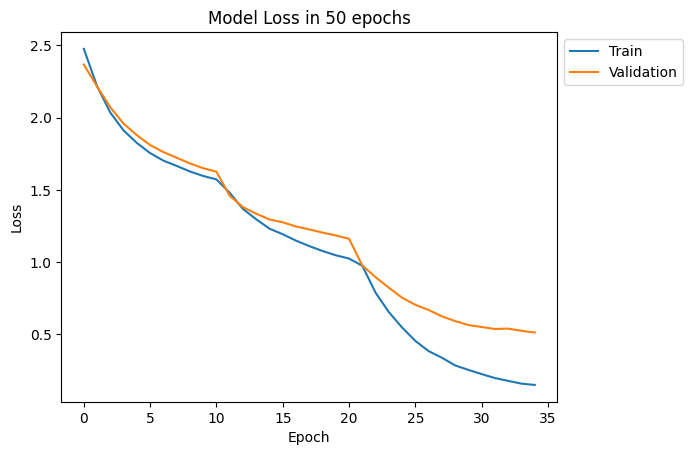

In [ ]:
#Plot model loss
plt.plot(model_history10.history['loss'])
plt.plot(model_history10.history['val_loss'])
plt.title('Model Loss in 50 epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

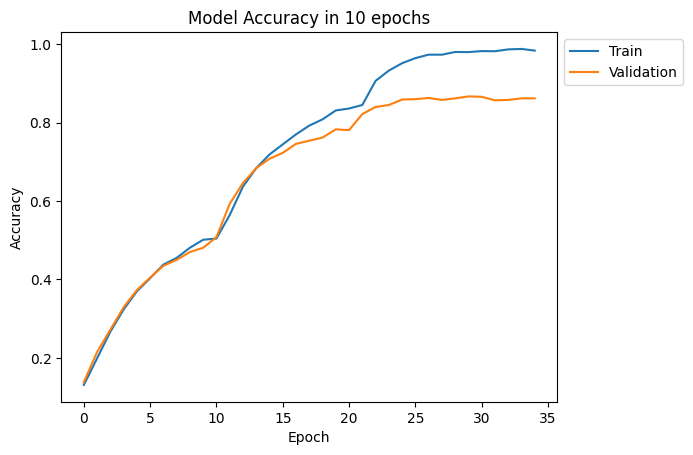

In [ ]:
#Plot model akurasi
plt.plot(model_history10.history['accuracy'])
plt.plot(model_history10.history['val_accuracy'])
plt.title('Model Accuracy in 10 epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [ ]:
#Melihat akurasi,presisi, dan recall model menggunakan data validasi
from sklearn.metrics import classification_report

predictions = model.predict(val_dataset)
true_labels = val_dataset.classes
class_indices = val_dataset.class_indices
class_labels = {v: k for k, v in class_indices.items()}

predicted_labels = np.argmax(predictions, axis=1)
report = classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()))
print("Classification Report:\n", report)

32/32 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step
Classification Report:
                                                precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.94      0.97      0.96       100
                        Tomato___Early_blight       0.74      0.78      0.76       100
                         Tomato___Late_blight       0.80      0.90      0.85       100
                           Tomato___Leaf_Mold       0.96      0.81      0.88       100
                  Tomato___Septoria_leaf_spot       0.87      0.84      0.85       100
Tomato___Spider_mites Two-spotted_spider_mite       0.82      0.88      0.85       100
                         Tomato___Target_Spot       0.77      0.71      0.74       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.98      0.97      0.97       100
                 Tomato___Tomato_mosaic_virus       0.82      0.96      0.88       100
                             Tomato___healthy       0.95      0.80

In [ ]:
#Accuracy dan Error Rate
loss, accuracy = model.evaluate(val_dataset)
error_rate = 1 - accuracy

print(f'Accuracy: {accuracy}')
print(f'Error Rate: {error_rate}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.8788 - loss: 0.4653
Accuracy: 0.8619999885559082
Error Rate: 0.1380000114440918


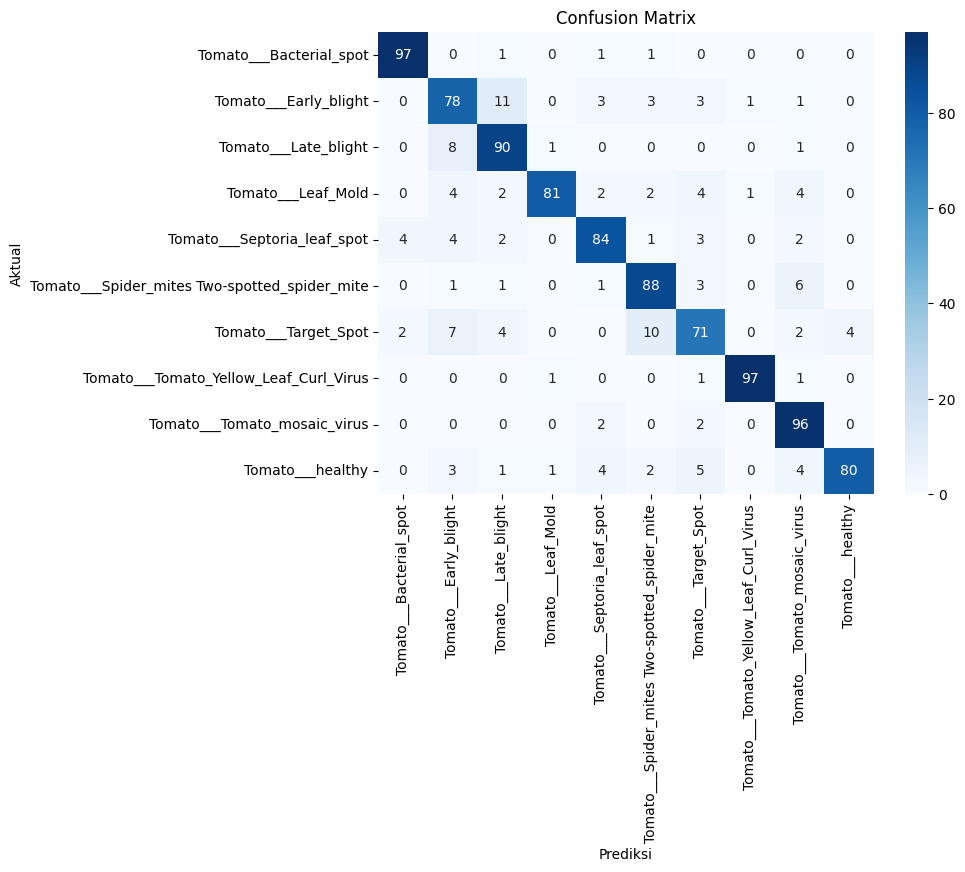

In [ ]:
#Matriks konfusi model dari data validasi
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Membuat matriks konfusi
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileUpload(value={}, accept='image/*', description='Upload')

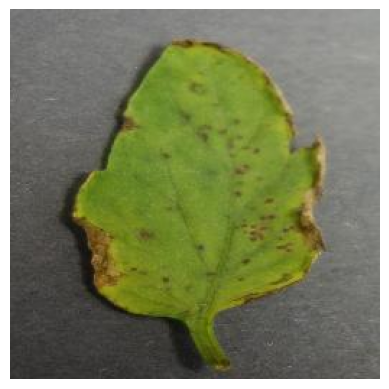

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Gambar ini diprediksi sebagai: Healthy


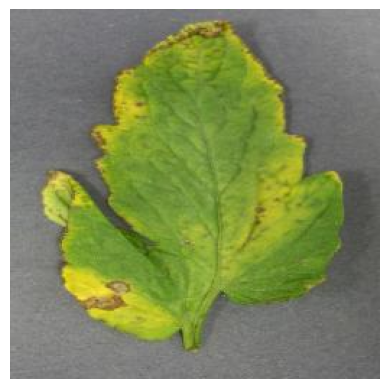

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Gambar ini diprediksi sebagai: Healthy


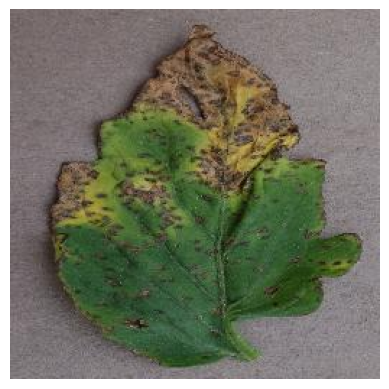

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Gambar ini diprediksi sebagai: Healthy


In [ ]:
#Mount gdrive
from google.colab import drive
drive.mount('/content/drive')

#Import library
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import ipywidgets as widgets

#Fungsi untuk melakukan prediksi gambar
def predict_image(model, img, class_labels):
    img = img.resize((224, 224))  # Ubah ukuran sesuai model
    img = img_to_array(img)
    img = img / 255.0  # Normalisasi
    img = np.expand_dims(img, axis=0)  # Tambahkan dimensi batch

    #Melakukan prediksi
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]

    return predicted_class

#Daftar nama kelas
class_labels = ['Bacterial Spot', 'Leaf Mold', 'Tomato Mosaic Virus', 'Healthy']

#Membuat widget unggahan file
upload = widgets.FileUpload(accept='image/*', multiple=False)

#Fungsi untuk menangani unggahan file dan prediksi
def on_upload_change(change):
    for name, file_info in upload.value.items():
        image = Image.open(io.BytesIO(file_info['content']))
        plt.imshow(image)
        plt.axis('off')
        plt.show()

        predicted_class = predict_image(model, image, class_labels)
        print("Gambar ini diprediksi sebagai:", predicted_class)

#Memicu fungsi saat ada perubahan pada unggahan
upload.observe(on_upload_change, names='value')

#Menampilkan widget unggahan
display(upload)


In [ ]:
# Memuat model yang telah disimpan pada proses training
model = load_model('/content/drive/MyDrive/daun_tomat.keras')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileUpload(value={}, accept='image/*', description='Upload')

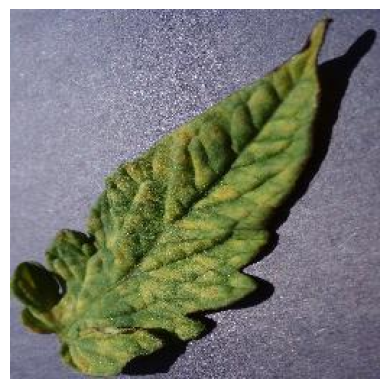

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Gambar ini diprediksi sebagai: Healthy

Deskripsi Penyakit:
Tidak ada masalah kesehatan pada tanaman.

Saran Pengobatan/Pencegahan:
- Lanjutkan perawatan normal: penyiraman, pemupukan, dan pengawasan.


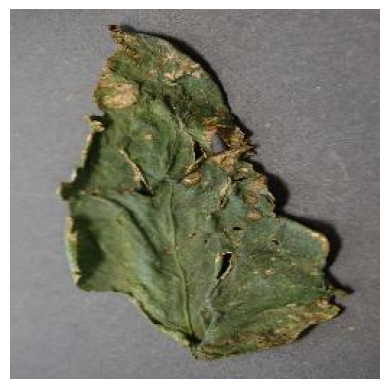

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Gambar ini diprediksi sebagai: Bacterial Spot

Deskripsi Penyakit:
Penyakit yang disebabkan oleh bakteri yang menyebabkan bercak pada daun.

Saran Pengobatan/Pencegahan:
- Gunakan fungisida atau bakterisida yang sesuai.
- Cek drainase tanah dan perbaiki sirkulasi udara.
- Buang daun yang terinfeksi untuk mencegah penyebaran.
- Pastikan tanaman tidak terlalu rapat agar sirkulasi udara lancar.


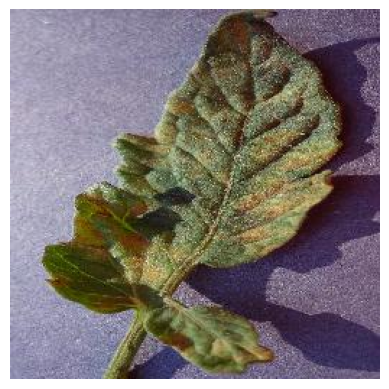

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Gambar ini diprediksi sebagai: Healthy

Deskripsi Penyakit:
Tidak ada masalah kesehatan pada tanaman.

Saran Pengobatan/Pencegahan:
- Lanjutkan perawatan normal: penyiraman, pemupukan, dan pengawasan.


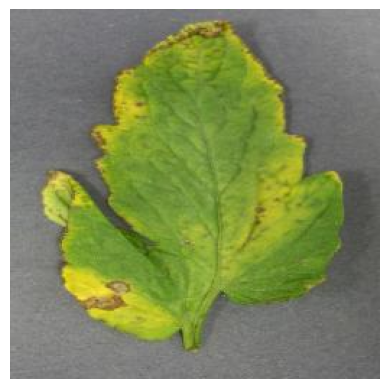

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Gambar ini diprediksi sebagai: Bacterial Spot

Deskripsi Penyakit:
Penyakit yang disebabkan oleh bakteri yang menyebabkan bercak pada daun.

Saran Pengobatan/Pencegahan:
- Gunakan fungisida atau bakterisida yang sesuai.
- Cek drainase tanah dan perbaiki sirkulasi udara.
- Buang daun yang terinfeksi untuk mencegah penyebaran.
- Pastikan tanaman tidak terlalu rapat agar sirkulasi udara lancar.


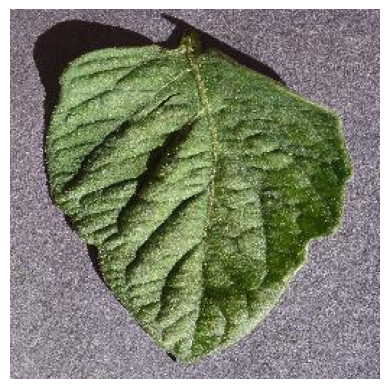

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Gambar ini diprediksi sebagai: Tomato Mosaic Virus

Deskripsi Penyakit:
Virus yang menyebabkan daun tomat menjadi bercak dan berkerut.

Saran Pengobatan/Pencegahan:
- Sayangnya, tidak ada pengobatan langsung untuk infeksi virus.
- Segera buang tanaman yang terinfeksi untuk mencegah penyebaran lebih lanjut.
- Periksa benih dan alat pertanian untuk menghindari penyebaran virus.


In [ ]:
#Mount gdrive
from google.colab import drive
drive.mount('/content/drive')

#Import library
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import ipywidgets as widgets

#Fungsi untuk melakukan prediksi gambar
def predict_image(model, img, class_labels):
    img = img.resize((224, 224))  # Ubah ukuran sesuai model
    img = img_to_array(img)
    img = img / 255.0  # Normalisasi
    img = np.expand_dims(img, axis=0)  # Tambahkan dimensi batch
    #Melakukan prediksi
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]

    return predicted_class

#Daftar nama kelas (pastikan urutan label ini sesuai dengan pelatihan model)
class_labels = ['Bacterial Spot', 'Leaf Mold', 'Tomato Mosaic Virus', 'Healthy']

#Saran pengobatan/pencegahan berdasarkan penyakit yang terdeteksi
treatment_guide = {
    'Bacterial Spot': {
        'description': 'Penyakit yang disebabkan oleh bakteri yang menyebabkan bercak pada daun.',
        'treatment': [
            'Gunakan fungisida atau bakterisida yang sesuai.',
            'Cek drainase tanah dan perbaiki sirkulasi udara.',
            'Buang daun yang terinfeksi untuk mencegah penyebaran.',
            'Pastikan tanaman tidak terlalu rapat agar sirkulasi udara lancar.'
        ]
    },
    'Leaf Mold': {
 'description': 'Penyakit jamur yang menyebabkan bercak-bercak kuning pada daun.',
        'treatment': [
            'Gunakan fungisida berbasis tembaga untuk mengendalikan jamur.',
            'Pastikan tanaman cukup sinar matahari dan ventilasi udara yang baik.',
            'Hindari penyiraman dari atas yang dapat menyebabkan kelembaban tinggi di daun.'
        ]
    },
    'Tomato Mosaic Virus': {
        'description': 'Virus yang menyebabkan daun tomat menjadi bercak dan berkerut.',
        'treatment': [
            'Sayangnya, tidak ada pengobatan langsung untuk infeksi virus.',
            'Segera buang tanaman yang terinfeksi untuk mencegah penyebaran lebih lanjut.',
            'Periksa benih dan alat pertanian untuk menghindari penyebaran virus.'
        ]
    },
    'Healthy': {
        'description': 'Tidak ada masalah kesehatan pada tanaman.',
        'treatment': [
            'Lanjutkan perawatan normal: penyiraman, pemupukan, dan pengawasan.'
        ]
    }
}

#Membuat widget unggahan file
upload = widgets.FileUpload(accept='image/*', multiple=False)

#Fungsi untuk menangani unggahan file dan prediksi
def on_upload_change(change):
    for name, file_info in upload.value.items():
        image = Image.open(io.BytesIO(file_info['content']))  #Membaca gambar dari file
        plt.imshow(image)  #Menampilkan gambar yang diunggah
        plt.axis('off')
        plt.show()

        #Melakukan prediksi penyakit pada tanaman tomat
        predicted_class = predict_image(model, image, class_labels)
        print(f"Gambar ini diprediksi sebagai: {predicted_class}")

        #Menampilkan deskripsi dan saran pengobatan/pencegahan berdasarkan penyakit yang terdeteksi
        treatment = treatment_guide.get(predicted_class, {})

        if treatment:
            print("\nDeskripsi Penyakit:")
            print(treatment['description'])
            print("\nSaran Pengobatan/Pencegahan:")
            for tip in treatment['treatment']:
                print(f"- {tip}")
        else:
            print("Tidak ada informasi pengobatan yang tersedia untuk penyakit ini.")

#Memicu fungsi saat ada perubahan pada unggahan
upload.observe(on_upload_change, names='value')

#Menampilkan widget unggahan
display(upload)
